In [39]:
#imports and dataframes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from dateutil.relativedelta import relativedelta
from datetime import date

patients = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Patients")
edVisits = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDVisits")
ambulVisits = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "AmbulatoryVisits")
readminRegistry = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "ReAdmissionRegistry")
discharges = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Discharges")
providers = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Providers")

# Take the Reason For Visit from user , find the number of patients admitted with the ReasonForVisit

ReasonForVisit = input("Enter the ReasonForVisit you want to search for: ")

# Filter the DataFrame to only include patients with the given ReasonForVisit
patients_with_reason = edVisits[edVisits.ReasonForVisit == ReasonForVisit]
#print(patients_with_reason)

# Get the number of patients with the given ReasonForVisit
num_patients = len(patients_with_reason)

# Print the result
print(f"{num_patients} patients were admitted with ReasonForVisit '{ReasonForVisit}'.")

Enter the ReasonForVisit you want to search for: Fever
234 patients were admitted with ReasonForVisit 'Fever'.


In [44]:
#Which departmentID has maximum number of visits scheduled.
result = ambulVisits.groupby(['VisitDepartmentID'])['VisitDepartmentID'].count()
dept_with_max_visits = result.idxmax()
max_visits = result.max()
print("Department with maximum number of visits:",dept_with_max_visits,"\nTotal number if visits for department", dept_with_max_visits,":", max_visits)

Department with maximum number of visits: 11 
Total number if visits for department 11 : 102


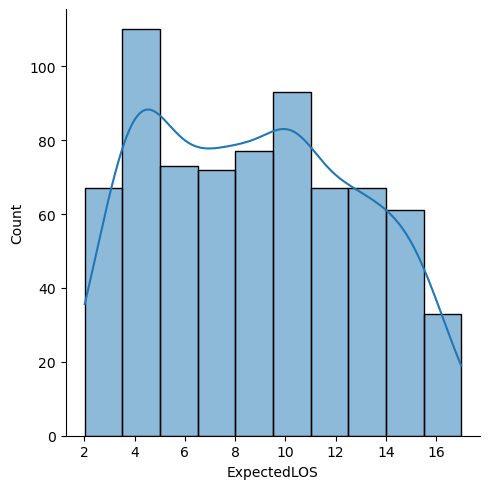

In [16]:
#Plot a graph to show the distribution of expected length of stay.
sns.displot(discharges['ExpectedLOS'], kde=True, bins=10)
plt.show()

In [49]:
#convert admission and discharge dates to datetime objects
readminRegistry['Admissiondate']=pd.to_datetime(readminRegistry['AdmissionDate'])
readminRegistry['Dischargedate']=pd.to_datetime(readminRegistry['DischargeDate'])
#Calculate the actual LOS by subtracting admission date from discharge date
readminRegistry['ActualLOS']=(readminRegistry['Dischargedate']-readminRegistry['Admissiondate']).dt.days
#dispaly rows where actual LOS is greater than expectedLOS
readminRegistry[readminRegistry['ActualLOS']>readminRegistry['ExpectedLOS']]

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,Admissiondate,Dischargedate,ActualLOS
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,2018-01-01,2018-01-05 05:47:04.933,4
10,568,12,2018-01-01,2018-01-09 09:21:47.300,Home,Hospitalist,Pneumonia,7.162811,0.671473,1.0,5.0,1.0,2018-01-01,2018-01-09 09:21:47.300,8
11,107,13,2018-01-01,2018-01-09 21:34:42.467,Home,Hospitalist,Flu,4.554479,0.266584,1.0,5.0,1.0,2018-01-01,2018-01-09 21:34:42.467,8
14,305,15,2018-01-01,2018-01-10 17:24:37.526,Home,Hospitalist,Hypertension,6.369161,0.646007,NaN,NaN,NaN,2018-01-01,2018-01-10 17:24:37.526,9
16,439,17,2018-01-01,2018-01-12 14:16:51.024,Home,Hospitalist,Kidney Failure,8.357081,0.630937,NaN,NaN,NaN,2018-01-01,2018-01-12 14:16:51.024,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,533,737,2018-02-22,2018-03-07 19:50:58.083,Home,ICU,Pneumonia,10.563688,0.583075,NaN,NaN,NaN,2018-02-22,2018-03-07 19:50:58.083,13
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN,2018-02-22,2018-03-08 02:43:18.749,14
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN,2018-02-22,2018-03-08 09:27:18.377,14
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN,2018-02-22,2018-03-10 06:06:12.068,16


In [29]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


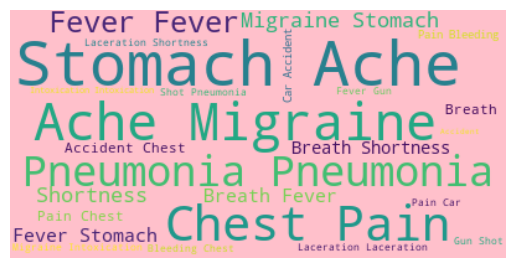

In [31]:
#Create a WordCloud Chart with Reason For Visit.
from wordcloud import WordCloud
text = " ".join(review for review in edVisits.ReasonForVisit)
# Generate a word cloud
wordcloud = WordCloud(background_color = 'pink').generate(text)
#Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
#np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30. When the value is less than 6, print as -1,else print 99.
arry=np.arange(1,31).reshape(6,5)
desired_elements = np.concatenate((arry[0:1, 3:], arry[4:, 3:]), axis=None)
#Print the result
print(desired_elements)
# when the value is less than 6, print as -1, else print 99
for elem in desired_elements:
    if elem < 6:
        print("-1", end=" ")
    else:
        print("99", end=" ")








[ 4  5 24 25 29 30]
-1 -1 99 99 99 99 

In [51]:
#Delete the column 'DischargeDispostion' iteratively.

# Load the hospital dataset
df = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Discharges")

# Iterate over the columns in the dataframe
for column in df.columns:
    # Check if the column name contains 'dischargedisposition'
    if 'dischargedisposition' in column.lower():
        # Delete the column
        del df[column]

# Save the modified dataset to a new CSV file
df.to_excel('hospital_without_discharge.xlsx', index=False)

In [53]:
#Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)

# Load the hospital dataset into a pandas DataFrame
#hospital_df = pd.read_csv('hospital.csv')

# Count the number of patients with SBP > 180 and DBP > 120
num_hypertensive_patients = len(ambulVisits[(ambulVisits['BloodPressureSystolic'] > 180) & (ambulVisits['BloodPressureDiastolic'] > 120)])

# Print the count of hypertensive patients
print(f"There are {num_hypertensive_patients} patients who are prone to hypertension crisis (SBP > 180 and DBP > 120).")

There are 101 patients who are prone to hypertension crisis (SBP > 180 and DBP > 120).


In [57]:
#Display the patient details with maximum pulse pressure.

# Load the hospital dataset into a DataFrame
#df = pd.read_csv('hospital_dataset.csv')

# Calculate the pulse pressure for each patient
df['pulse_pressure'] = df['BloodPressureSystolic'] - df['BloodPressureDiastolic']

# Get the patient details with the maximum pulse pressure
max_pulse_pressure = df['pulse_pressure'].max()
patient_details = df[df['pulse_pressure'] == max_pulse_pressure]

# Display the patient details
print(patient_details)

     VisitID  PatientMRN  ProviderID DateofVisit           DateScheduled  \
195      847         865          35  2019-03-25 2019-03-12 10:02:35.807   

     VisitDepartmentID  VisitType  BloodPressureSystolic  \
195                  4  Follow Up                  188.0   

     BloodPressureDiastolic      Pulse VisitStatus Hypertension Level  \
195              117.850163  60.329856   Completed                NaN   

     pulse_pressure  
195       70.149837  


In [56]:
#Create bins to segregate Patients with 'Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension'. Create a new column to show your analysis.

# Load the hospital dataset
df = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "AmbulatoryVisits")

# Define the bins and labels for the hypertension levels
bins = [0, 120, 129, 139,180]
labels = ['Mild Hypertension', 'Moderate Hypertension', 'High Hypertension','Severe Hypertension']

# Create a new column to store the hypertension level based on the systolic blood pressure readings
df['Hypertension Level'] = pd.cut(df['BloodPressureSystolic'], bins=bins, labels=labels)

# Display the updated dataset with the new column
print(df.head())

   VisitID  PatientMRN  ProviderID DateofVisit           DateScheduled  \
0      202         840          29  2019-03-19 2019-03-13 07:59:24.000   
1      436         820          25  2019-03-19 2019-02-24 07:10:31.043   
2      794         879          30  2019-04-02 2019-03-19 01:41:55.656   
3      799         884          37  2019-03-03 2019-02-25 01:25:39.696   
4      515          32          26  2019-03-16 2019-02-20 06:44:59.617   

   VisitDepartmentID     VisitType  BloodPressureSystolic  \
0                 10      Physical                  188.0   
1                  3     Follow Up                  179.0   
2                 11  Telemedicine                  133.0   
3                  4  Telemedicine                  132.0   
4                 11  Telemedicine                  131.0   

   BloodPressureDiastolic      Pulse VisitStatus   Hypertension Level  
0              144.143427  83.044920     No Show                  NaN  
1              118.876808  90.309544     No 

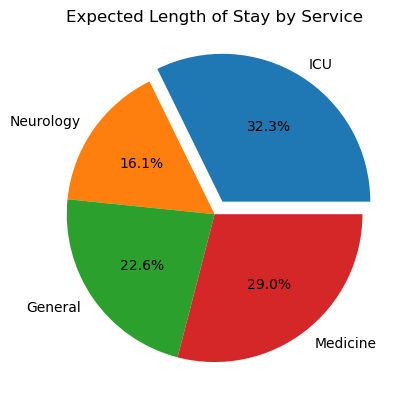

In [59]:
#Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.

# Data
Service = ["ICU", "Neurology", "General", "Medicine"]
ExpectedLOS = [10, 5, 7, 9]

# Find index of Service with the highest ExpectedLOS
max_index = ExpectedLOS.index(max(ExpectedLOS))

# Create explode tuple
explode = tuple(0.1 if i == max_index else 0 for i in range(len(Service)))

# Plot the pie chart
plt.pie(ExpectedLOS, labels=Service, explode=explode, autopct='%1.1f%%')
plt.title("Expected Length of Stay by Service")
plt.show()

In [60]:
#Calculate the mortality by diagnosis
# Create a new column indicating whether the patient expired or survived
discharges['Mortality'] = discharges['DischargeDisposition'].apply(lambda x: 'Expired' if x == 'D' else 'Survived')

# Group the dataset by diagnosis and mortality
grouped_data = discharges.groupby(['PrimaryDiagnosis', 'Mortality'])

# Calculate the number of patients and percentage of patients that died for each diagnosis
mortality_by_diagnosis = grouped_data.agg({'PatientID': 'count'}).reset_index()
mortality_by_diagnosis.rename(columns={'PatientID': 'Number of Patients'}, inplace=True)

# Calculate the percentage of patients that died for each diagnosis
total_patients_by_diagnosis = mortality_by_diagnosis.groupby('PrimaryDiagnosis').agg({'Number of Patients': 'sum'})
mortality_by_diagnosis = mortality_by_diagnosis.merge(total_patients_by_diagnosis, on='PrimaryDiagnosis')
#mortality_by_diagnosis['Percentage Mortality'] = mortality_by_diagnosis['Number of Patients'] / mortality_by_diagnosis['Number of Patients_y'] * 100

# Print the results
print(mortality_by_diagnosis)
#This code calculates the number of patients and the percentage of patients that died for each diagnosis in the hospital dataset. You may need to adjust the column names and data preprocessing steps to fit your specific dataset.








      PrimaryDiagnosis Mortality  Number of Patients_x  Number of Patients_y
0                  AMI  Survived                    48                    48
1                 Afib  Survived                    11                    11
2           Broken Leg  Survived                     9                     9
3             Diabetes  Survived                    64                    64
4                Fever  Survived                    19                    19
5                  Flu  Survived                    80                    80
6        Heart Failure  Survived                    78                    78
7         Hip Fracture  Survived                    23                    23
8         Hypertension  Survived                    50                    50
9       Kidney Failure  Survived                    20                    20
10    Knee Replacement  Survived                    23                    23
11          Laceration  Survived                    29                    29

In [5]:
#Display data by splitting age in 4 quartiles and labeling the quartiles.

# read in hospital dataset
df = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Patients")

# calculate quartiles based on age column
quartiles = pd.qcut(df['DateOfBirth'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# add quartile labels to dataframe
df['age_quartile'] = quartiles

# print dataframe with quartile labels
print(df.head())

   PatientID FirstName LastName             DateOfBirth Gender   Race  \
0          1     Lanni      Sue 1960-01-01 00:00:00.000   Male  White   
1          2       Far    Myers 1985-11-15 02:08:42.090   Male  White   
2          3   Devlin   Michael 1976-04-15 02:52:09.762   Male  White   
3          4   Carmine    Texas 1968-10-15 03:32:13.635   Male  White   
4          5     Tann      Bama 1962-05-01 19:12:58.950   Male  White   

  Language age_quartile  
0  English           Q1  
1  English           Q4  
2  English           Q3  
3  English           Q2  
4  English           Q1  


In [76]:
patients = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Patients")
patients["Gender"].value_counts()

Male      537
Female    408
Name: Gender, dtype: int64

In [77]:
#Using arrays and loops, find the count of patients based on gender.

# Sample dataset
#patients = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Patients")

# Initialize counters
male_count = 0
female_count = 0

# Loop through the dataset
for gender in patients['Gender']:
    if gender == 'Male':
        male_count += 1
    elif gender == 'Female':
        female_count += 1

# Print the results
print("Number of Male patients:",male_count)
print("Number of Female patiennts:",female_count)

Number of Male patients: 537
Number of Female patiennts: 408


In [79]:
#Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).
# Load the hospital dataset
edVisits = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDVisits")

# Group the data by ReasonForVisit and EDDisposition and count the number of patients
patient_count = edVisits.groupby(['ReasonForVisit', 'EDDisposition']).size()

# Unstack the data to make it more readable
patient_count = patient_count.unstack()

# Print the result
print(patient_count)

EDDisposition        Admitted  Discharged
ReasonForVisit                           
Accident                 39.0         NaN
Bleeding                 16.0        15.0
Car Accident             17.0         NaN
Chest Pain               94.0        15.0
Cough                     NaN         1.0
Fever                    46.0       188.0
Gun Shot                 16.0         NaN
Intoxication              NaN        30.0
Laceration                NaN        30.0
Migraine                 47.0       109.0
Pneumonia               136.0        65.0
Shortness of Breath      72.0        77.0
Stomach Ache             32.0       154.0


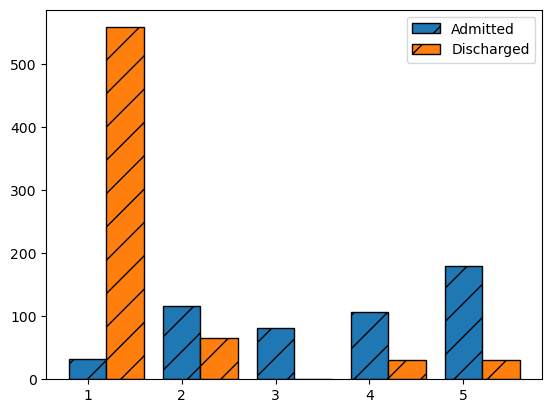

In [131]:
#Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.

# Load hospital dataset into pandas dataframe
edVisits = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDVisits")

# Create a bar chart with hatch patterns
#bar = sns.barplot(y='Acuity',x='EDDisposition', hue='Acuity',data=edVisits)
acuity_values = edVisits["Acuity"].unique()
disposition_values = edVisits["EDDisposition"].unique()
fig, ax = plt.subplots()
width = 0.4
index = range(len(acuity_values))

for i, disp_val in enumerate(disposition_values):
    values = []
    #print(values)
    for ac_val in acuity_values:
        #print(acuity_values)
        count = len(edVisits[(edVisits["EDDisposition"] == disp_val) & (edVisits["Acuity"] == ac_val)])
        values.append(count)
    ax.bar([j + i*width for j in index], values, width, label=disp_val, hatch='/', edgecolor='black')

ax.set_xticks(index)
ax.set_xticklabels(acuity_values)
ax.legend()
plt.show()
